<a href="https://colab.research.google.com/github/mariiaanisimova/Computations-for-CoDipA-1.0/blob/main/attitude_pos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a computational analysis of lingustic features of the observed attitudes that were manually annotated and constitute contents of the CoDipA 1.0 corpus.

In [1]:
import pandas as pd
from pathlib import Path
import spacy

In [2]:
# loading the data
file_name = 'attitude.csv'
data_path = Path('.')/'attitude.csv'

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv(data_path)
df['pos'] = None

# Display the DataFrame (optional)
print(df.head)

<bound method NDFrame.head of       Unnamed: 0  n_doc  n_sent  attitude_start_in_text  attitude_end_in_text  \
0              0   1159       2                     174                   184   
1              1   1159       2                     196                   269   
2              2   1159       2                     174                   184   
3              3   1159       2                     196                   269   
4              4   1159       2                     270                   326   
...          ...    ...     ...                     ...                   ...   
3274        3274   1583      27                    4520                  4643   
3275        3275   1583      27                    4707                  4720   
3276        3276   1583      27                    4707                  4720   
3277        3277   1583      27                    4796                  4807   
3278        3278   1583      27                    4796                  4807  

In [4]:
nlp = spacy.load("en_core_web_sm")


In [5]:
# prompt: in df, if the 'tag' column contains 'Inscribed' or 'Invoked', delete the row and save as unique_df

# Assuming df is already defined from the previous code

df = df[~df['tag'].str.contains('Inscribed|Invoked|No annotation', na=False)]

df.to_csv('unique_attitude.csv', index=False)
print(df.head())


   Unnamed: 0  n_doc  n_sent  attitude_start_in_text  attitude_end_in_text  \
0           0   1159       2                     174                   184   
1           1   1159       2                     196                   269   
4           4   1159       2                     270                   326   
6           6   1159       3                     356                   414   
8           8   1159       3                     399                   406   

                             tag  \
0  Appreciation-quality-negative   
1   Judgement-propriety-negative   
4    Judgement-veracity-negative   
6   Judgement-propriety-negative   
8  Appreciation-quality-negative   

                                            attitude   pos  
0                                         disturbing  None  
1  Georgia is facing a well-calculated\nprovocati...  None  
4  in order to justify\na premeditated military i...  None  
6  That evaluation has been transformed into\na b...  None  
8        

In [6]:
# prompt: doc = nlp(iterate over each row in the in df['attitude'])

for index, row in df.iterrows():
  doc = nlp(row['attitude'])
  # Process the 'doc' object and update the 'pos' column in the DataFrame
  # For example, you could assign the sentiment score to the 'pos' column
  # df.loc[index, 'pos'] = doc.sentiment
  # Or extract specific information from the doc object based on your needs

  # You can access the 'attitude' value using row['attitude']
  # ... your code to process each row ...

  # Example: Print the processed text and the corresponding row index
  print(f"Processing row {index}: {row['attitude']}")


Processing row 0: disturbing
Processing row 1: Georgia is facing a well-calculated
provocation to escalate the situation
Processing row 4: in order to justify
a premeditated military intervention
Processing row 6: That evaluation has been transformed into
a brutal reality
Processing row 8:  brutal
Processing row 10: extremely alarming
Processing row 12: vividly
Processing row 14:  illegally
Processing row 16: criminal regime
Processing row 18: speculating
Processing row 21: Nothing could be
further from the truth
Processing row 22: I can say with full responsibility
Processing row 24: the Government's actions were
taken in self-defence after repeated armed provocations
and with the sole goal of protecting the civilian
population and preventing further loss of life
Processing row 26: direct and open
Processing row 28: The world is witnessing a direct and open
violation
Processing row 30: Russia is openly
challenging the international community and
jeopardizing established international 

In [7]:
# prompt: concatenate all token.pos_ for each line of the doc in the df['pos']cell of that line, use ' ' as a separator

for index, row in df.iterrows():
  doc = nlp(row['attitude'])
  pos_tags = [token.pos_ for token in doc]
  df.loc[index, 'pos'] = ' '.join(pos_tags)

In [8]:
print(df['pos'])

0                                                    VERB
1       PROPN AUX VERB DET ADV PUNCT VERB SPACE NOUN P...
4              ADP NOUN PART VERB SPACE DET VERB ADJ NOUN
6            DET NOUN AUX AUX VERB ADP SPACE DET ADJ NOUN
8                                              SPACE NOUN
                              ...                        
3269                                                  ADJ
3271                                            PRON VERB
3273    PRON VERB SCONJ SPACE DET ADJ NOUN ADP ADP DET...
3275                                                  ADJ
3277                                                  ADJ
Name: pos, Length: 1938, dtype: object


In [9]:
# prompt: add a new column to the df called unique_pos

unique_pos_list = []
for index, row in df.iterrows():
  doc = nlp(row['attitude'])
  pos_tags = [token.pos_ for token in doc]
  unique_pos = set(pos_tags)
  unique_pos_list.append(' '.join(unique_pos))

df['unique_pos'] = unique_pos_list
print(df['unique_pos'])

0                                               VERB
1       NOUN VERB DET PART SPACE ADV PUNCT AUX PROPN
4                   NOUN VERB DET PART ADJ ADP SPACE
6                    NOUN VERB SPACE ADJ AUX ADP DET
8                                         NOUN SPACE
                            ...                     
3269                                             ADJ
3271                                       VERB PRON
3273    NOUN VERB SCONJ SPACE ADJ PRON PROPN ADP DET
3275                                             ADJ
3277                                             ADJ
Name: unique_pos, Length: 1938, dtype: object


In [10]:
# prompt: create a frequency list of the pos from df['pos'], sort it from bigger to smaller frequencies

from collections import Counter

# Flatten the list of POS tags
all_pos_tags = []
for pos_tags_str in df['pos']:
  if isinstance(pos_tags_str, str):
    all_pos_tags.extend(pos_tags_str.split())

# Create a frequency dictionary
pos_counts = Counter(all_pos_tags)

# Sort the frequency dictionary by value in descending order
sorted_pos_counts = dict(sorted(pos_counts.items(), key=lambda item: item[1], reverse=True))

print(sorted_pos_counts)

{'NOUN': 3729, 'VERB': 2650, 'DET': 2406, 'ADP': 2241, 'ADJ': 2058, 'PRON': 1743, 'AUX': 1415, 'PROPN': 1369, 'ADV': 1009, 'PUNCT': 854, 'PART': 840, 'CCONJ': 709, 'SCONJ': 424, 'SPACE': 238, 'NUM': 102, 'X': 7, 'INTJ': 3, 'SYM': 1}


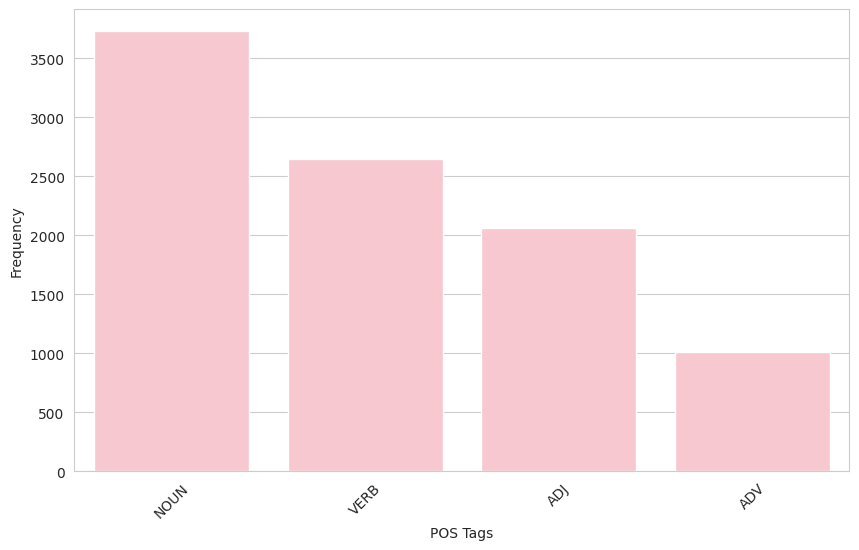

In [16]:
# prompt: visualize the pos_frequency in seaborn, include only VERB, ADV, NOUN, ADJ, make the figure pink

import seaborn as sns
import matplotlib.pyplot as plt

# Filter pos_frequency to include only VERB, ADV, NOUN, ADJ
filtered_pos_frequency = {k: v for k, v in sorted_pos_counts.items() if k in ['VERB', 'ADV', 'NOUN', 'ADJ']}

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=list(filtered_pos_frequency.keys()), y=list(filtered_pos_frequency.values()), color='pink')

# Customize the plot
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
#plt.title("Frequency of POS Tags (VERB, ADV, NOUN, ADJ)")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

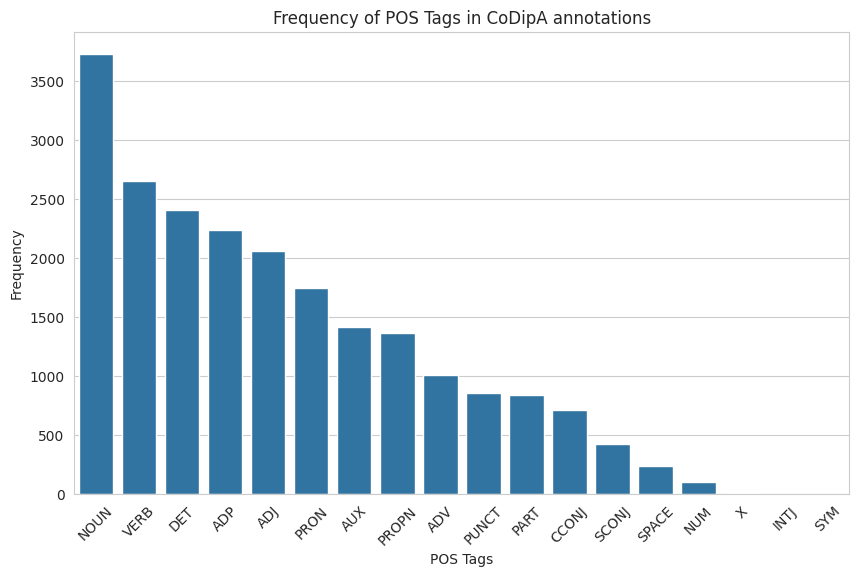

<Figure size 640x480 with 0 Axes>

In [13]:
# prompt: visualize all pos in seaborn make the figure pink

# ... (Your existing code) ...


# Filter pos_frequency to include only VERB, ADV, NOUN, ADJ
filtered_pos_frequency = {k: v for k, v in sorted_pos_counts.items()}

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.set_style("whitegrid")  # Optional: Set a style for the plot
ax = sns.barplot(x=list(filtered_pos_frequency.keys()), y=list(filtered_pos_frequency.values()))
#ax.set_facecolor('pink')  # Set the background color of the plot to pink

# Customize the plot
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("Frequency of POS Tags in CoDipA annotations")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

# Save the plot
plt.savefig(Path('.')/'pos_frequency_unfiltered.png')

In [22]:
# prompt: In df, select only rows that contain "Affect" in the column 'tag', save to a new df called attitude_df

affect_df = df[df['tag'].str.contains('Affect', na=False)]
print(affect_df.head())

     Unnamed: 0  n_doc  n_sent  attitude_start_in_text  attitude_end_in_text  \
22           22   1159      31                    3510                  3544   
34           34   1159      36                    4451                  4460   
40           40   1159      38                    4895                  4910   
93           93   1160      35                    5744                  5760   
100         100   1160      40                    6410                  6420   

                              tag                            attitude  \
22    Affect-inclination-positive  I can say with full responsibility   
34    Affect-inclination-positive                           We demand   
40   Affect-satisfaction-positive                    We are\ngrateful   
93       Affect-security-negative                    We share concern   
100   Affect-inclination-positive                          we suggest   

                            pos                  unique_pos  
22   PRON AUX VERB

In [23]:
# prompt:  create a frequency list of the pos from affect_df['pos'], sort it from bigger to smaller frequencies, print it

# Assuming affect_df is defined and contains the 'pos' column

# Flatten the list of POS tags from affect_df['pos']
all_pos_tags_affect = []
for pos_tags_str in affect_df['pos']:
  if isinstance(pos_tags_str, str):
    all_pos_tags_affect.extend(pos_tags_str.split())

# Create a frequency dictionary
pos_counts_affect = Counter(all_pos_tags_affect)

# Sort the frequency dictionary by value in descending order
sorted_pos_counts_affect = dict(sorted(pos_counts_affect.items(), key=lambda item: item[1], reverse=True))

sorted_pos_counts_affect

{'VERB': 416,
 'PRON': 409,
 'NOUN': 187,
 'AUX': 171,
 'ADV': 163,
 'ADJ': 131,
 'PROPN': 102,
 'PART': 93,
 'DET': 79,
 'ADP': 70,
 'PUNCT': 44,
 'SPACE': 20,
 'CCONJ': 19,
 'SCONJ': 4,
 'INTJ': 1}

In [25]:
#Calculating pos-frequencies for Judgement


judgement_df = df[df['tag'].str.contains('Judgement', na=False)]
print(judgement_df.head())


# Flatten the list of POS tags from judgement_df['pos']
all_pos_tags_judgement = []
for pos_tags_str in judgement_df['pos']:
  if isinstance(pos_tags_str, str):
    all_pos_tags_judgement.extend(pos_tags_str.split())

# Create a frequency dictionary
pos_counts_judgement = Counter(all_pos_tags_judgement)

# Sort the frequency dictionary by value in descending order
sorted_pos_counts_judgement = dict(sorted(pos_counts_judgement.items(), key=lambda item: item[1], reverse=True))

sorted_pos_counts_judgement

    Unnamed: 0  n_doc  n_sent  attitude_start_in_text  attitude_end_in_text  \
1            1   1159       2                     196                   269   
4            4   1159       2                     270                   326   
6            6   1159       3                     356                   414   
14          14   1159      27                    3082                  3092   
16          16   1159      28                    3241                  3256   

                             tag  \
1   Judgement-propriety-negative   
4    Judgement-veracity-negative   
6   Judgement-propriety-negative   
14   Judgement-veracity-negative   
16  Judgement-propriety-negative   

                                             attitude  \
1   Georgia is facing a well-calculated\nprovocati...   
4   in order to justify\na premeditated military i...   
6   That evaluation has been transformed into\na b...   
14                                          illegally   
16                     

{'NOUN': 3465,
 'DET': 2288,
 'VERB': 2183,
 'ADP': 2138,
 'ADJ': 1446,
 'PRON': 1314,
 'PROPN': 1251,
 'AUX': 1232,
 'PUNCT': 790,
 'PART': 741,
 'ADV': 684,
 'CCONJ': 620,
 'SCONJ': 418,
 'SPACE': 193,
 'NUM': 99,
 'X': 7,
 'INTJ': 2,
 'SYM': 1}

In [26]:
#Calculating pos-frequencies for Appreciation

appreciation_df = df[df['tag'].str.contains('Appreciation', na=False)]
print(appreciation_df.head())


# Flatten the list of POS tags from appreciation_df['pos']
all_pos_tags_appreciation = []
for pos_tags_str in appreciation_df['pos']:
  if isinstance(pos_tags_str, str):
    all_pos_tags_appreciation.extend(pos_tags_str.split())

# Create a frequency dictionary
pos_counts_appreciation = Counter(all_pos_tags_appreciation)

# Sort the frequency dictionary by value in descending order
sorted_pos_counts_appreciation = dict(sorted(pos_counts_appreciation.items(), key=lambda item: item[1], reverse=True))

sorted_pos_counts_appreciation

    Unnamed: 0  n_doc  n_sent  attitude_start_in_text  attitude_end_in_text  \
0            0   1159       2                     174                   184   
8            8   1159       3                     399                   406   
10          10   1159       4                     480                   498   
12          12   1159       6                     738                   745   
26          26   1159      33                    3899                  3914   

                              tag            attitude            pos  \
0   Appreciation-quality-negative          disturbing           VERB   
8   Appreciation-quality-negative              brutal     SPACE NOUN   
10  Appreciation-quality-negative  extremely alarming        ADV ADJ   
12  Appreciation-quality-positive             vividly            ADV   
26  Appreciation-quality-negative     direct and open  ADJ CCONJ ADJ   

    unique_pos  
0         VERB  
8   NOUN SPACE  
10     ADV ADJ  
12         ADV  
26   CC

{'ADJ': 481,
 'ADV': 162,
 'NOUN': 77,
 'CCONJ': 70,
 'VERB': 51,
 'DET': 39,
 'ADP': 33,
 'SPACE': 25,
 'PUNCT': 20,
 'PRON': 20,
 'PROPN': 16,
 'AUX': 12,
 'PART': 6,
 'NUM': 3,
 'SCONJ': 2}